# Pefil de intensidad imagen completa E4

Programa para obtener el perfil de intensidad de una imagen completa en blanco y negro. Experimento realizado con un LED, maxima intensidad 5mA con pasos de 1%.

Se usan las imagenes de la cargpeta Led

In [13]:
# Importamos las librerias necesarias
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray
import os

## Analisis para una imagen

In [14]:
# Cargamos imagen, se convierte a matriz
image = imread('../Led/L40.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [15]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [16]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

In [17]:
# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

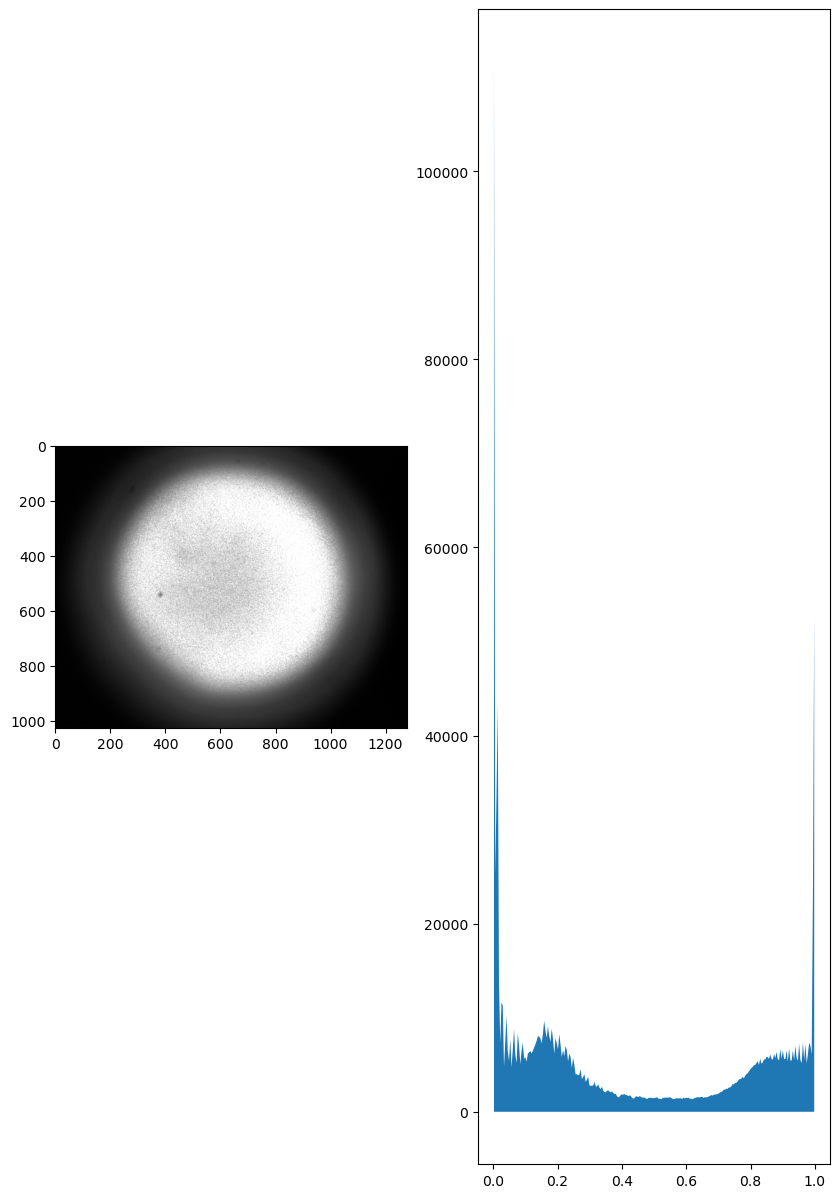

In [18]:
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)

In [19]:
# Calculamos el promedio de intensidad
average_intensity = image.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')

Promedio de intensidad: 0.4183412492275238
Punto máximo en valor de número de píxeles: 111643
Máximo de intensidad: 0.0025169583968818188


## Analisis para todas las imagenes

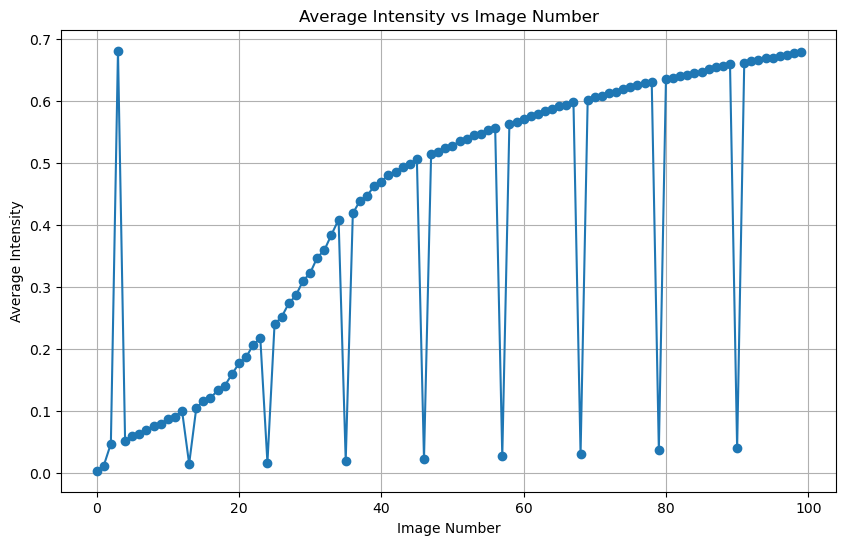

In [21]:
# Ruta a la carpeta 'Led'
folder_path = '../Led'

# Lista para almacenar los resultados
average_intensities = []

# Obtenemos una lista de archivos en la carpeta 'Led'
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])

# Asegurarse de que haya 100 imágenes
image_files = image_files[:100]

# Recorremos las imágenes y procesamos cada una
for img_file in image_files:
    # Cargamos la imagen
    img_path = os.path.join(folder_path, img_file)
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Calculamos el promedio de intensidad
    average_intensity = image.mean()
    
    # Guardamos el promedio de intensidad en la lista
    average_intensities.append(average_intensity)

# Graficamos el promedio de intensidad en función del número de imagen
plt.figure(figsize=(10, 6))
plt.plot(range(100), average_intensities, marker='o')
plt.xlabel('Image Number')
plt.ylabel('Average Intensity')
plt.title('Average Intensity vs Image Number')
plt.grid(True)
plt.show()


In [22]:
# Convertimos los resultados a un DataFrame
df = pd.DataFrame({
    'Image Number': range(len(average_intensities)),
    'Average Intensity': average_intensities
})

# Mostrar el DataFrame
print(df)

    Image Number  Average Intensity
0              0           0.003440
1              1           0.011609
2              2           0.046967
3              3           0.680819
4              4           0.051357
..           ...                ...
95            95           0.669729
96            96           0.672553
97            97           0.674019
98            98           0.676710
99            99           0.678144

[100 rows x 2 columns]


## Analisis de imagen por segmento

In [23]:
# Lista para almacenar los resultados
results = []

# Nombres de las regiones
region_names = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E']

# Recorremos las imágenes desde B0 hasta B36
for i in range(100):
    # Formateamos el nombre de la imagen
    img_path = f'../Led/L{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Dimensiones de la imagen
    rows, cols = image.shape
    region_height = rows // 3
    region_width = cols // 3
    
    # Función para obtener la subdivisión central de una región dada
    def get_central_subdivision(region):
        sub_height = region.shape[0] // 3
        sub_width = region.shape[1] // 3
        return region[sub_height:2*sub_height, sub_width:2*sub_width]
    
    # Extraemos las 9 regiones principales
    region_1 = image[0:region_height, 0:region_width]
    region_2 = image[0:region_height, region_width:2*region_width]
    region_3 = image[0:region_height, 2*region_width:cols]
    region_4 = image[region_height:2*region_height, 0:region_width]
    region_5 = image[region_height:2*region_height, region_width:2*region_width]
    region_6 = image[region_height:2*region_height, 2*region_width:cols]
    region_7 = image[2*region_height:rows, 0:region_width]
    region_8 = image[2*region_height:rows, region_width:2*region_width]
    region_9 = image[2*region_height:rows, 2*region_width:cols]
    
    # Obtenemos las subdivisiones centrales de las esquinas y la central de la región central
    region_A = get_central_subdivision(region_1)
    region_B = get_central_subdivision(region_3)
    region_C = get_central_subdivision(region_7)
    region_D = get_central_subdivision(region_9)
    region_E = get_central_subdivision(region_5)
    
    regions = [region_A, region_B, region_C, region_D, region_E]
    
    # Procesamos cada región
    for j, region in enumerate(regions):
        # Obtenemos el histograma
        hist_image, bins_image = imhist(region)
        
        # Calculamos el promedio de intensidad
        average_intensity = region.mean()
        
        # Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
        max_pixel_value = hist_image.max()
        max_intensity_value = bins_image[hist_image.argmax()]
        
        # Guardamos los resultados en la lista
        results.append({
            'Image': f'B{i}.png',
            'Region': region_names[j],
            'Average Intensity': average_intensity,
            'Max Pixel Value': max_pixel_value,
            'Max Intensity': max_intensity_value
        })

# Convertimos los resultados a un DataFrame
df = pd.DataFrame(results)

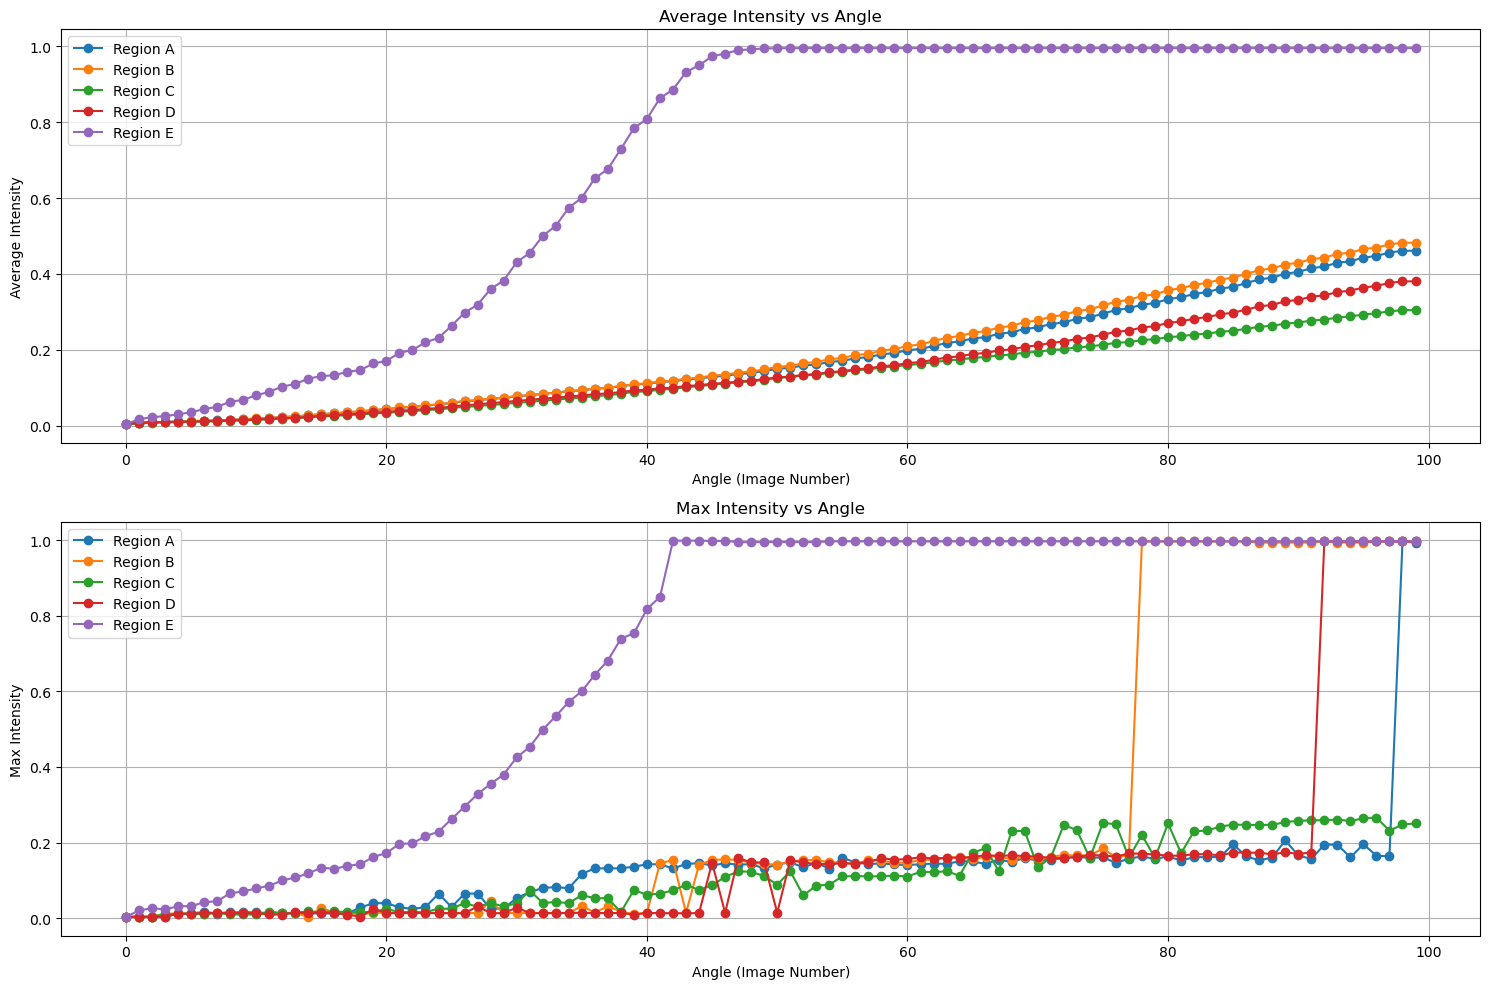

       Image    Region  Average Intensity  Max Pixel Value  Max Intensity
0     B0.png  Region A           0.003378            14799       0.003110
1     B0.png  Region B           0.003462            14720       0.003110
2     B0.png  Region C           0.003382            15177       0.003065
3     B0.png  Region D           0.003433            15046       0.003110
4     B0.png  Region E           0.003428            14829       0.003083
..       ...       ...                ...              ...            ...
495  B99.png  Region A           0.461210              201       0.994024
496  B99.png  Region B           0.482293             1786       0.996949
497  B99.png  Region C           0.304541              204       0.250424
498  B99.png  Region D           0.380458              571       0.996949
499  B99.png  Region E           0.995245            16046       0.997198

[500 rows x 5 columns]


In [24]:

# Graficamos el promedio de intensidad y el máximo de intensidad para cada región
angles = range(100)
plt.figure(figsize=(15, 10))

for region_name in region_names:
    df_region = df[df['Region'] == region_name]
    
    plt.subplot(2, 1, 1)
    plt.plot(angles, df_region['Average Intensity'], marker='o', label=region_name)
    plt.xlabel('Angle (Image Number)')
    plt.ylabel('Average Intensity')
    plt.title('Average Intensity vs Angle')
    
    plt.subplot(2, 1, 2)
    plt.plot(angles, df_region['Max Intensity'], marker='o', label=region_name)
    plt.xlabel('Angle (Image Number)')
    plt.ylabel('Max Intensity')
    plt.title('Max Intensity vs Angle')

plt.subplot(2, 1, 1)
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar el DataFrame
print(df)
